# Représentation des vecteurs vitesse

___

### Les données expérimentales

Les abscisses des positions du centre de masse sont issues du pointage de la vidéo. Les valeurs sont tout d'abord affichées et sélectionnées dans le tableur de Latispro. Elle sont ensuite collées dans un simple éditeur de texte (Bloc Note par exemple). Le séparateur décimal qui est souvent la virgule "," doit être remplacé par un point ".". La fonction Remplacer de l'éditeur de texte permet d'effectuer rapidement ce travail.

Les valeurs sont ensuite organisées manuellement sous forme d'une liste Python. Une liste est délimitée par des crochets [ ... ] et les valeurs qu'elle contient sont séparées par des virgules.

$ \text{Exemple : X=[ valeur1, valeur2, valeur3, valeur4 ]}$

Pour finir, la liste est copiée dans la cellule de code ci-dessous :

In [55]:
X=[0.00238651451236104,0.00238651451236104,0.00238651451236104,0.00238651451236104,0.00238651451236104,0.00776457538528762,0.00776457538528762,0.00776457538528762,0.00776457538528762,0.00776457538528762,0.00776457538528762,0.0131426362582142,0.0131426362582142]

La même méthode est utilisée pour obtenir la liste des ordonnées des positions successives du centre de masse :

In [56]:
Y=[1.88057212566172,1.85371176595673,1.81610726236976,1.76238654295979,1.69254960772683,1.61196852861188,1.51527123367394,1.39708565097201,1.26278385244709,1.11773791004018,0.956575751810276,0.779297377757384,0.585902787881501]

Une petite vérification : les longeurs des listes des abscisses et des ordonnées doivent être identiques :

In [57]:
len(X)==len(Y)

True

___

### Représentation graphique des positions successives du centre de masse.

Il est maintenant possible de repésenter graphiquement les positions successives du centre de masse à l'aide du module $matplotlib.pyplot$.

In [72]:
import matplotlib.pyplot as plt
def graph_y_x():
    plt.scatter(X, Y, c='black', marker='+')
    plt.xlabel("x (en m)")
    plt.ylabel("y (en m)")
    plt.ylim(0.5,2)
    plt.xlim(-1,1)
    plt.show()

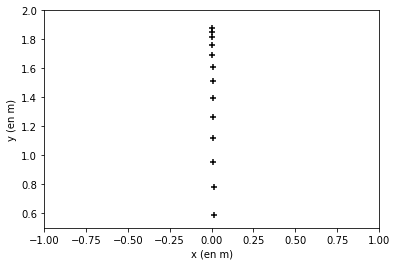

In [73]:
graph_y_x()

___

### Calcul des vitesses instantannées du centre de masse.

Pour calculer les vitesses instantanées du centre de masse dans ses différentes positions, il est nécessaire de connaître la durée $dt$ séparant deux images de la vidéo. Elle est calculée à partir de la fréquence des images :

In [6]:
f=25 #images/s
dt=1/f
print(dt,"s")

0.04 s


Les coordonnées VX et VY des vecteurs vitesse instantannée peuvent être calculées à l'aide des relations :

<div style="color:#FF0000; text-align:center; background-color:#FFF9F9;">$ \overrightarrow{V_{i}} ~(VX_{i},VY_{i}) ~~~~avec~~~~ VX_{i} = \dfrac{X_{i+1}-X_{i}}{dt} ~~~~et~~~~ VY_{i} = \dfrac{Y_{i+1}-Y_{i}}{dt}$</div>



Si la longueur de la liste des positions est égale à 10, elle contient 10 valeurs. Leurs indices de position $i$ dans la liste varie alors de 0 jusqu'à 9. Plus généralement, l'indice de position $i$ variera de 0 jusqu'à len(Y)-1.

| Y=[ | ..., | ..., | ..., | ..., | ..., | ..., | ..., | ..., | ..., | ... | ] |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| |0|1|2|3|4|5|6|7|8|9| |

Le terme $Y[i+1]-Y[i]$ pourra être calculé pour i variant de i=0 jusqu'à i=8. En effet, le terme pour i=9 ne peut pas être calculé car Y[9+1] n'existe pas. L'indice i doit donc varier de 0 jusqu'à len(Y)-2. Dans le $range$ de la boucle $for$, il faut indiquer la valeur de départ pour i, soit 0, ainsi que la valeur d'arrivée + 1. Comme on souhaite que i s'arrête à len(Y)-2, il faut lui indiquer len(Y)-2+1 = len(Y)-1 comme valeur d'arrivée.

In [65]:
VX=[  (X[i+1]-X[i])/dt   for i in range(0,len(X)-1)]
print(VX)
VY=[  (Y[i+1]-Y[i])/dt   for i in range(0,len(Y)-1)]
print(VY)

[0.0, 0.0, 0.0, 0.0, 0.1344515218231645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1344515218231645, 0.0]
[-0.671508992624753, -0.9401125896742468, -1.3430179852492508, -1.7459233808239993, -2.014526977873754, -2.417432373448497, -2.9546395675482504, -3.357544963122999, -3.6261485601727483, -4.029053955747602, -4.431959351322301, -4.8348647468970745]


___

### Représentation des vecteurs vitesses instantannées du centre de masse.

Pour tracer les vecteurs vitesse, nous allons utiliser la fonction $quiver$ de $matplotlib.pyplot$. Elle permet de tracer un vecteur de coordonnées (u,v) au point de coordonnées (x,y): **plt.quiver(x,y,u,v)**. D'autres paramètres sont ajoutés : **angles='xy'** permet de tracer le vecteur selon la direction de (x,y) vers (x+u,y+v), **scale_units='xy'** permet de fixer une échelle de représentation cohérente avec les échelles sur les axes x et y. Il est alors possible de fixer un facteur d'échelle à l'aide du paramètre **scale**.

Il est nécessaire de mettre en place une boucle pour tracer le vecteur vitesse en chaque position du centre de masse.

In [76]:
import matplotlib.pyplot as plt
def graph_y_x_v(s=20):
    plt.figure(figsize = (5, 10))
    plt.scatter(X, Y, c='black', marker='+')
    plt.xlabel("x (en m)")
    plt.ylabel("y (en m)")
    plt.ylim(0.5,2)
    plt.xlim(-1,1)
    for i in range(len(VX)):
        plt.quiver(X[i], Y[i] ,VX[i] , VY[i], scale_units='xy',angles='xy', scale=s, color='green')
    plt.show()

Le module $ipywidgets$ permet d'interagir facilement avec les graphiques notamment à l'aide de curseurs. Dans notre situation, nous allons créer un curseur permettant de régler le facteur d'échelle s. Il variera entre 0 et 50 par pas de 0.1. Sa valeur par défaut est de 20.

In [77]:
import ipywidgets as widgets
widgets.interact(graph_y_x_v, s=(0,50,0.1))

interactive(children=(FloatSlider(value=20.0, description='s', max=50.0), Output()), _dom_classes=('widget-int…

<function __main__.graph_y_x_v(s=20)>